# Introduction
State notebook purpose here

### Imports

Import libraries and write settings here.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
# Data manipulation
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm

from IPython import get_ipython
ipython = get_ipython()

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)

#import cufflinks as cf
#cf.go_offline(connected=True)
#cf.set_config_file(theme='white')


/tmp/ipykernel_119342/522556316.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

In [2]:
!head input.txt

9897656789865467895698765469899988672134598894345689864101378965457932349943210987654789653198789434
8789542499996878954329984398789976561012987789245678953212567892345791998899329899765678969997668912
7678943978987989965998993297649875432129876567956789864487678991056899877778939769886789998766457899
4578999868998996899867894976532986543299876476897899987569899989167898766567898654998898998655345678
2456987657679535679756799988643498657987654345789978899789998878998919954349997543219967987543237889
1234896545568986798645678999754989767898765456998769759899987765789329863238898659301256798793156891
2346789432379997987434689489899879898919876567899954346998796434678997642127789798512345989989247892
8756894210998989876545694378987868999101998688999863238987684323457789751015678987654459878678956994
9769995679876978998656789469876957893212999899989764649876576212345678953223489698866598754567897989
9878989989885467899787896598765648789329876959879986768985432101567789998654599549977987543

In [66]:
z = np.memmap("input.txt",mode="r",dtype='int8',shape=(100,101))
z = z[:,:-1] # trim newlines
z = z-ord("0")

In [67]:
z.shape

(100, 100)

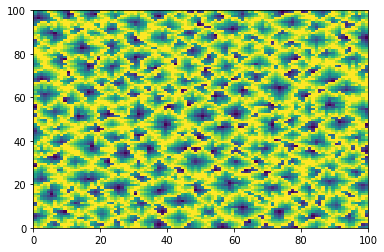

In [68]:
plt.pcolormesh(z)

In [35]:
import scipy.signal,scipy.ndimage

In [28]:
z = np.frombuffer(b"""2199943210
3987894921
9856789892
8767896789
9899965678
""",dtype='int8')
z=z.reshape((5,11))[:,:-1]
z=z-ord("0")

In [29]:
z

array([[2, 1, 9, 9, 9, 4, 3, 2, 1, 0],
       [3, 9, 8, 7, 8, 9, 4, 9, 2, 1],
       [9, 8, 5, 6, 7, 8, 9, 8, 9, 2],
       [8, 7, 6, 7, 8, 9, 6, 7, 8, 9],
       [9, 8, 9, 9, 9, 6, 5, 6, 7, 8]], dtype=int8)

In [79]:
zpad = np.pad(z,1,mode='edge')
zpad[0,:]+=1
zpad[:,0]+=1
zpad[-1,:]+=1
zpad[:,-1]+=1

In [80]:
locs = []
vals = []
for r in range(1,zpad.shape[0]-1):
    for c in range(1,zpad.shape[1]-1):
        val = zpad[r,c]
        left = zpad[r,c-1]
        right = zpad[r,c+1]
        up = zpad[r+1,c]
        down = zpad[r-1,c]
        if val < left and val < right and val < up and val < down:
            locs.append((r,c))
            vals.append(val)

In [81]:
for r,c in locs[::7]:
    print(zpad[r-1:r+2,c-1:c+2])

[[6 5 7]
 [5 4 6]
 [6 8 7]]
[[2 1 3]
 [1 0 1]
 [2 1 2]]
[[9 9 6]
 [5 3 5]
 [9 8 6]]
[[6 4 5]
 [4 3 4]
 [5 4 5]]
[[9 9 8]
 [9 4 9]
 [9 5 9]]
[[9 2 9]
 [3 1 9]
 [4 2 9]]
[[8 9 9]
 [9 0 9]
 [9 2 9]]
[[9 3 2]
 [9 0 1]
 [8 1 3]]
[[3 2 3]
 [2 1 2]
 [3 2 3]]
[[3 1 9]
 [9 0 1]
 [8 9 9]]
[[3 2 3]
 [6 1 2]
 [5 2 3]]
[[3 2 3]
 [2 1 2]
 [3 2 3]]
[[ 4  2  3]
 [ 9  1  2]
 [ 8  9 10]]
[[3 2 3]
 [1 0 9]
 [2 9 8]]
[[3 1 2]
 [5 0 3]
 [2 1 7]]
[[4 3 4]
 [3 2 3]
 [4 4 7]]
[[3 2 3]
 [2 1 4]
 [3 2 5]]
[[7 7 8]
 [6 5 6]
 [7 6 7]]
[[10  9  8]
 [ 3  2  9]
 [ 4  3  9]]
[[4 3 4]
 [3 2 3]
 [8 3 4]]
[[8 9 8]
 [9 0 9]
 [9 1 2]]
[[3 9 8]
 [1 0 9]
 [2 1 2]]
[[9 1 9]
 [9 0 1]
 [8 9 9]]
[[3 9 7]
 [2 1 9]
 [3 2 9]]
[[4 4 5]
 [3 2 4]
 [9 3 5]]
[[4 3 4]
 [3 2 3]
 [9 3 4]]
[[9 9 9]
 [4 2 9]
 [9 9 8]]
[[9 9 7]
 [1 0 9]
 [2 1 2]]
[[6 5 6]
 [6 3 9]
 [5 4 9]]
[[6 5 6]
 [5 4 7]
 [7 5 6]]
[[3 2 2]
 [4 0 1]
 [2 1 9]]
[[3 1 2]
 [1 0 3]
 [2 5 4]]
[[6 4 5]
 [4 3 4]
 [5 4 7]]
[[4 2 3]
 [2 1 2]
 [3 3 3]]
[[5 4 6]
 [4 3 5]
 [5 9 6]]
[[

In [82]:
locs

[(1, 14),
 (1, 57),
 (1, 79),
 (1, 85),
 (1, 92),
 (2, 7),
 (2, 21),
 (2, 38),
 (2, 47),
 (2, 70),
 (2, 99),
 (3, 26),
 (3, 65),
 (4, 31),
 (5, 15),
 (5, 44),
 (5, 69),
 (6, 1),
 (6, 84),
 (6, 95),
 (6, 100),
 (7, 21),
 (8, 10),
 (8, 26),
 (8, 39),
 (8, 53),
 (8, 74),
 (10, 63),
 (11, 72),
 (11, 91),
 (12, 1),
 (12, 13),
 (12, 24),
 (12, 33),
 (12, 81),
 (12, 86),
 (12, 98),
 (13, 45),
 (13, 57),
 (14, 53),
 (14, 68),
 (16, 6),
 (16, 31),
 (16, 65),
 (16, 95),
 (17, 11),
 (17, 19),
 (17, 78),
 (18, 38),
 (18, 49),
 (19, 26),
 (19, 72),
 (19, 83),
 (20, 99),
 (21, 59),
 (22, 89),
 (23, 3),
 (23, 17),
 (24, 33),
 (24, 43),
 (24, 47),
 (24, 76),
 (26, 26),
 (26, 70),
 (26, 85),
 (26, 97),
 (27, 8),
 (27, 45),
 (27, 55),
 (27, 64),
 (28, 38),
 (28, 89),
 (29, 1),
 (30, 75),
 (31, 13),
 (31, 23),
 (31, 32),
 (31, 49),
 (31, 61),
 (31, 67),
 (31, 78),
 (32, 96),
 (33, 7),
 (33, 41),
 (33, 100),
 (34, 75),
 (34, 92),
 (35, 28),
 (36, 3),
 (36, 54),
 (36, 61),
 (36, 84),
 (36, 100),
 (37, 35),

In [83]:
sum(vals)+len(vals)

607

In [84]:
import scipy.ndimage

In [91]:
plt.pcolormesh(scipy.ndimage.)

TypeError: generate_binary_structure() missing 1 required positional argument: 'connectivity'

In [85]:
scipy.ndimage.watershed_ift()

<module 'scipy.ndimage' from '/home/glenn/miniconda3/envs/notebook/lib/python3.9/site-packages/scipy/ndimage/__init__.py'>

In [56]:
dr = np.diff(zpad,axis=0)
dc = np.diff(zpad,axis=1)

In [49]:
dr.shape

(6, 12)

In [53]:
dr

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  8, -1, -2, -1,  5,  1,  7,  1,  1,  1],
       [ 6,  6, -1, -3, -1, -1, -1,  5, -1,  7,  1,  1],
       [-1, -1, -1,  1,  1,  1,  1, -3, -1, -1,  7,  7],
       [ 1,  1,  1,  3,  2,  1, -3, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int8)

In [50]:
dc.shape

(7, 11)

In [42]:
zpad

array([[2, 2, 1, 9, 9, 9, 4, 3, 2, 1, 0, 0],
       [2, 2, 1, 9, 9, 9, 4, 3, 2, 1, 0, 0],
       [3, 3, 9, 8, 7, 8, 9, 4, 9, 2, 1, 1],
       [9, 9, 8, 5, 6, 7, 8, 9, 8, 9, 2, 2],
       [8, 8, 7, 6, 7, 8, 9, 6, 7, 8, 9, 9],
       [9, 9, 8, 9, 9, 9, 6, 5, 6, 7, 8, 8],
       [9, 9, 8, 9, 9, 9, 6, 5, 6, 7, 8, 8]], dtype=int8)

In [30]:
ext = scipy.signal.argrelextrema(z,np.less)

In [34]:
np.less?

In [31]:
len(ext[0])

6

In [33]:
ext

(array([2, 2, 2, 2, 3, 3]), array([2, 3, 4, 5, 0, 1]))

In [32]:
z[ext[0],ext[1]].sum()+len(ext[0])

47

In [24]:
np.gradient(z)

[memmap([[-1. , -1. , -1. , ...,  5. , -2. , -2. ],
         [-1. , -1. , -1. , ...,  2. ,  3. ,  2.5],
         [-2. , -1. , -0.5, ..., -1.5,  3. ,  3. ],
         ...,
         [ 1.5,  1. ,  1. , ...,  2.5,  0. ,  0. ],
         [ 1.5,  1. ,  1. , ...,  2.5,  1. ,  1.5],
         [ 1. ,  1. ,  1. , ..., -1. ,  1. ,  2. ]]),
 memmap([[-1. ,  0. , -0.5, ..., -3. ,  0. ,  1. ],
         [-1. ,  0. ,  1. , ..., -3.5, -3.5,  1. ],
         [-1. ,  0. ,  1. , ...,  1. ,  0.5,  0. ],
         ...,
         [-1. ,  0. ,  1. , ...,  0.5,  1.5,  1. ],
         [-2. , -0.5,  1. , ...,  0.5, -1. ,  1. ],
         [-2. , -0.5,  1.5, ...,  0.5,  0.5,  2. ]])]

In [22]:
ddz.shape

AttributeError: 'list' object has no attribute 'shape'

ValueError: too many values to unpack (expected 2)

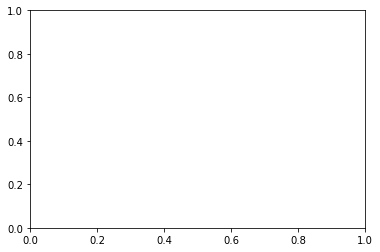

In [21]:
plt.pcolormesh(ddz)